In [50]:
# import here
import os
import PIL
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import pandas as pd
import sklearn
import skimage.io
import skimage.feature
import skimage.transform
import seaborn as sns
import skimage
import skimage.color
import re
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.color import rgb2gray

%matplotlib inline




In [15]:
print(skimage.__version__)


0.19.3


In [2]:
# Load pickled data
training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Dataset visualization for more indept understanding of its properties

* 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
* 'labels' is a 2D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
* 'sizes' is a list containing tuples, (width, height) representing the the original width and height the image.
* 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

In [3]:
# Number of training examples
n_train = len(X_train)
# Number of validation examples.
n_valid = len(X_valid)
# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape[:-1]

# Number of unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


## Data exploration visualization.

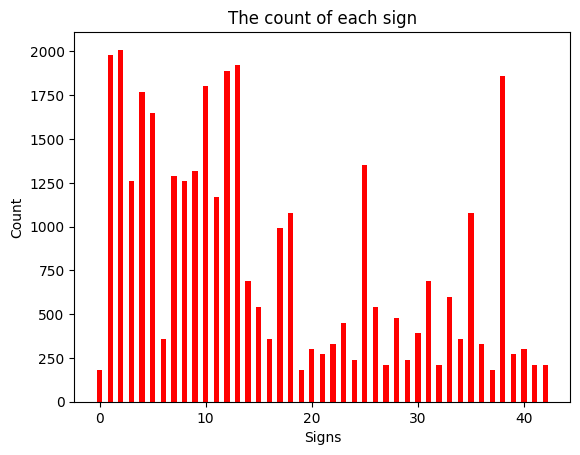

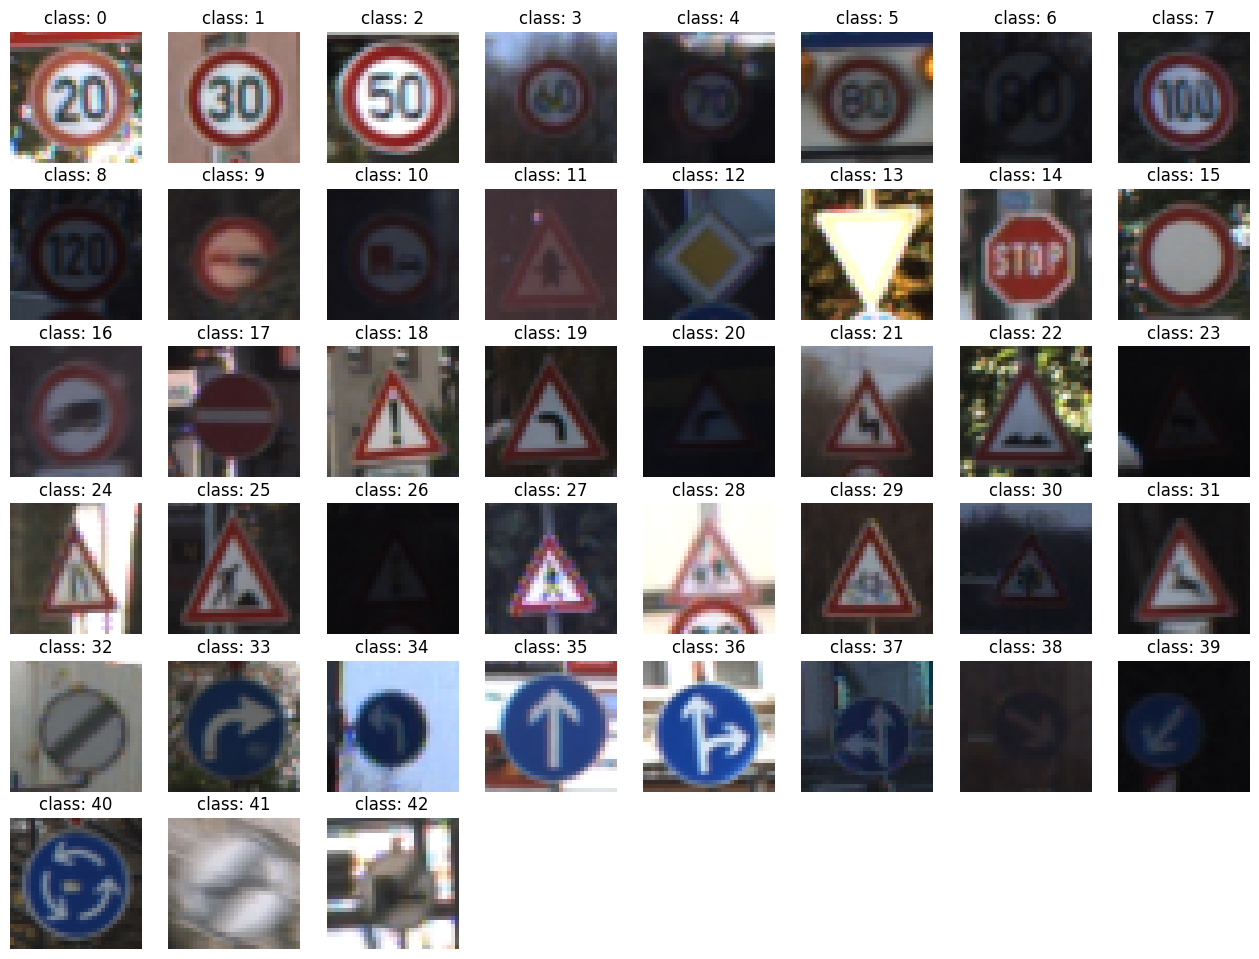

In [61]:

fig, ax = plt.subplots()
ax.bar(range(n_classes), np.bincount(y_train), 0.5, color='r')
ax.set_xlabel('Signs')
ax.set_ylabel('Count')
ax.set_title('The count of each sign')
plt.show()

plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])

In [20]:
print(y_train), print(y_test) 

[41 41 41 ... 25 25 25]
[16  1 38 ...  6  7 10]


(None, None)

In [21]:
print (X_train), print(X_test)

[[[[ 28  25  24]
   [ 27  24  23]
   [ 27  24  22]
   ...
   [ 32  28  24]
   [ 31  27  25]
   [ 31  27  26]]

  [[ 29  26  25]
   [ 27  25  23]
   [ 27  25  23]
   ...
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  [[ 28  26  26]
   [ 27  25  23]
   [ 26  25  23]
   ...
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  ...

  [[ 27  24  23]
   [ 28  25  24]
   [ 30  25  24]
   ...
   [ 27  24  23]
   [ 28  24  22]
   [ 29  25  22]]

  [[ 28  23  23]
   [ 29  24  24]
   [ 31  25  24]
   ...
   [ 27  24  23]
   [ 28  24  22]
   [ 28  24  21]]

  [[ 29  23  23]
   [ 30  24  24]
   [ 32  24  23]
   ...
   [ 27  24  22]
   [ 27  23  21]
   [ 26  22  20]]]


 [[[ 28  24  24]
   [ 26  23  23]
   [ 27  24  24]
   ...
   [ 31  28  26]
   [ 31  28  27]
   [ 32  28  27]]

  [[ 27  24  24]
   [ 27  24  24]
   [ 28  25  24]
   ...
   [ 31  27  25]
   [ 31  27  26]
   [ 33  29  27]]

  [[ 26  24  24]
   [ 26  24  24]
   [ 27  24  23]
   ...
   [ 31  26  25]
   [ 31  27  26]
   [ 33  29

(None, None)

In [22]:
X_train.shape,X_test.shape, y_train.shape ,y_test.shape

((34799, 32, 32, 3), (12630, 32, 32, 3), (34799,), (12630,))

### Let's perform Feature Extraction using a 50KM/hr speed limit traffic sign image

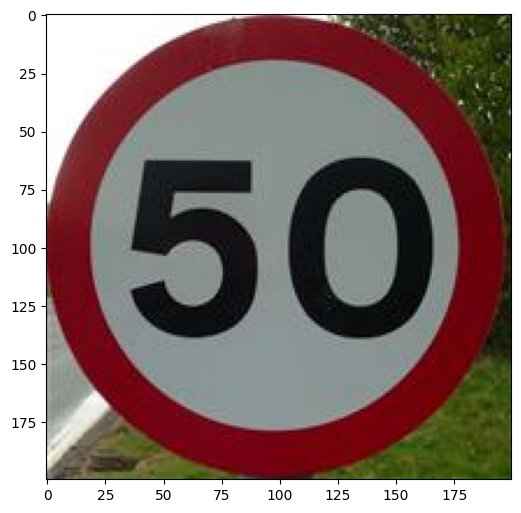

In [25]:
img = skimage.io.imread('Speed_limit.jpg')
plt.figure(figsize=(6,10))
plt.imshow(img)

### Let perform hog transoform as an example. It is a pivotal step in image processing with regards to machine. More about hog transformation can be found at: 

#### https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [38]:
#img_re = skimage.transform.rescale(img,1/3).reshape((67,67))

img_re = skimage.transform.rescale(img, 1/3).reshape((67, 67))
img_re = np.repeat(np.expand_dims(img_re, axis=-1), 3, axis=-1) # This will convert the image in 3 dimension if it is not in that format already
gray = skimage.color.rgb2gray(img_re)


gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,
                    pixels_per_cell=(14,14),
                    cells_per_block=(2,2),
                    visualize=True)



In [39]:
len(feature_vector)

324

In [40]:
gray.shape

(67, 67)

### Let's plot the image in both gray-scale and hog transform based-format

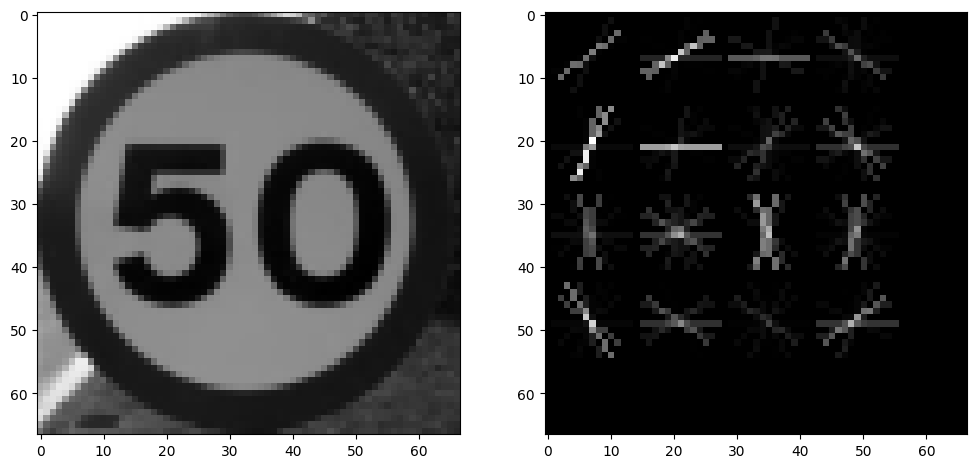

In [41]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

### Let perform image Preprocessing by creating a base estimator function. one fior rgb2gray transform and the other hog transformation

- Grayscale
- Hog (histogram oriented gradient) tranformer

### GrayScale estimator

In [51]:
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [52]:
X_train.shape

(34799, 32, 32, 3)

### Let's transform all our X_train data

In [53]:
rgb2grayobj = rgb2gray_transform()
X_train_gray = rgb2grayobj.fit_transform(X_train)

In [55]:
X_train_gray.shape

(34799, 32, 32)

### Let's visualize the one image in the X_train_gray and one image from original X_train of the same index

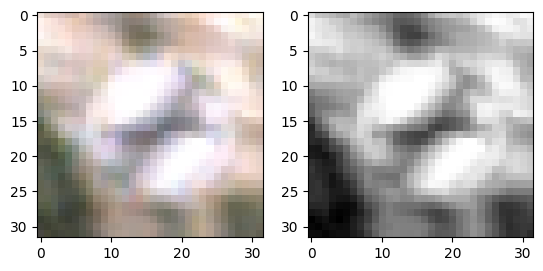

In [83]:
plt.subplot(1,2,1)
plt.imshow(X_train[40])
plt.subplot(1,2,2)
plt.imshow(X_train_gray[40],cmap='gray')

## Hog estimator

In [94]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block, visualize=False)
            
            return hog_features
            #return hog_img
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures
        #return hog_img

In [95]:
hogtrans = hogtransformer()
X_train_hog = hogtrans.fit_transform(X_train_gray)

In [96]:
X_train_hog.shape

(34799, 324)

## Let's build and train the machine learing model.

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

### Here, you can observe that we are setting our learoing rate to adaptive.


#### When learning_rate is set to **'adaptive'**, the learning rate is dynamically adjusted during training. Specifically, the learning rate is decreased if the training loss stops improving or increases, and increased if the training loss continues to decrease. This can help improve the speed and accuracy of convergence during training.

In [44]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.1,)

#### Let's visualize the shape of our train and text data

In [46]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((34799, 32, 32, 3), (12630, 32, 32, 3), (34799,), (12630,))

In [84]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

### Let's build a pipline

In [99]:
# pipeline
# step-1: convert into grayscale
X_train_gray = grayify.fit_transform(X_train)

# step-2: extract the features
X_train_hog = hogify.fit_transform(X_train_gray)

# step-3: Normalization
X_train_scale = scalify.fit_transform(X_train_hog)

# step-4: machine learning
model_sgd.fit(X_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [100]:
X_test_gray = grayify.fit_transform(X_test)
# step-2: extract the features
X_test_hog = hogify.fit_transform(X_test_gray)

# step-3: Normalization
X_test_scale = scalify.transform(X_test_hog)

y_pred_test = model_sgd.predict(X_test_scale)

In [102]:
print(y_pred_test)

[16  1 38 ...  3  9 10]


## Let's evaluate the model's performance on each class in our dataset

In [105]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
0,0.452055,0.550000,0.496241,60.00000
1,0.549645,0.645833,0.593870,720.00000
2,0.648541,0.652000,0.650266,750.00000
3,0.512048,0.566667,0.537975,450.00000
4,0.872372,0.880303,0.876320,660.00000
5,0.458777,0.547619,0.499276,630.00000
6,0.828125,0.706667,0.762590,150.00000
7,0.833856,0.591111,0.691808,450.00000
8,0.712794,0.606667,0.655462,450.00000
9,0.785558,0.747917,0.766275,480.00000


### Let's check the **cohen_kappa_score** The chen kappa score will tell us if the our is good or bad. if the kappa score is greater than 0.5, then our model is good model and if it is greated than 0.70, it is a super good model and if it is less than 0.5, it is a bad model 


#### You can learn the intuition behind Kappa score here---->[Kappa score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)

In [108]:
Kappa_Score = metrics.cohen_kappa_score(y_test,y_pred_test)

print(f'The kappa score of our model is: {Kappa_Score*100:.2f}%')

The kappa score of our model is: 73.61%


## Now, let's create a pipeline Model so that we can be able to perform some hyperparameter optimization

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
model_pipeline = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
])

In [111]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('grascale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(10, 10))),
                ('scale', StandardScaler()),
                ('sgd', SGDClassifier(eta0=0.001, learning_rate='adaptive'))])

In [112]:
y_pred = model_pipeline.predict(X_test)

In [114]:
print(y_pred)

[16  1 38 ...  3 23 10]


In [115]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
0,0.600000,0.350000,0.442105,60.000000
1,0.465734,0.462500,0.464111,720.000000
2,0.130277,0.238667,0.168550,750.000000
3,0.360996,0.193333,0.251809,450.000000
4,0.417824,0.546970,0.473753,660.000000
5,0.459184,0.142857,0.217918,630.000000
6,0.491803,0.800000,0.609137,150.000000
7,0.519608,0.353333,0.420635,450.000000
8,0.345550,0.146667,0.205928,450.000000
9,0.590278,0.708333,0.643939,480.000000


## Grid Search Method for hyperparameter tunning.

- Let's try to identify the best hyperparameters for our model


In [116]:
from sklearn.model_selection import GridSearchCV

In [132]:
estimator = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [133]:
## Two hyperparameters

param_grid = [
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['optimal'] 
    },
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['adaptive'],
        'sgd__eta0':[0.001, 0.01]
        #'sgd__gamma' : [0.001,0.01,0.1,1,2],
        
    }
]

In [134]:
### Let's search for the best parameters. Note that, you can use n_jobs= -1 if you are using a GPU, because -1 indicates parallel searching. You can also increase the 
### number of "cv" which is the cross fold validation if you have a strong computation power
model_grid = GridSearchCV(estimator,
                          param_grid=param_grid,scoring='accuracy',
                          n_jobs=1,cv=3,verbose=2)

In [135]:
model_grid.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.4s
[CV] END hogtran

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.1min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  38.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  39.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  37.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  46.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtr

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.5min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  44.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  45.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  43.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  22.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtr

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  22.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  23.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  22.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  43.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hog

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.1min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  43.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  42.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  41.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  46.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10,

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.5min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  49.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  51.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  48.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  24.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10,

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.5min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.7min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  25.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  25.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  25.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.2min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.2min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  39.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  41.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  39.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  49.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtr

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.5min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.4min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  48.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  48.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  48.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtr

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  56.8s


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  59.3s


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  55.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  11.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  12.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  11.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  41.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hog

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.5min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.1min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  43.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  45.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  39.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  55.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10,

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.7min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.3min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  53.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  55.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  50.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  12.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10,

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  58.8s


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.1min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time= 1.1min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  12.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  13.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  13.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransfor

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.2min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.9min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.6min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  26.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  27.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  26

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.9min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.6min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.9min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  27.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  16

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  26.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  22.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  21.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  16.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.0min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.0min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.3min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  29.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.7min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.9min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 1.5min
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  29.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  29.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  29.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  31.5s


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  30.9s


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  24.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  16.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  16.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  16.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total tim

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.1min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.1min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.2min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  24.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  25.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  26.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  23

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.4min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.7min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.4min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  25.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  25.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  26.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.5min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.2min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  27.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.1min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.3min


/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time= 2.5min
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  28.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
162 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/pipeline.py", line 359, in _f

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grascale', rgb2gray_transform()),
                                       ('hogtransform', hogtransformer()),
                                       ('scale', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__learning_rate': ['optimal'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__eta0': [0.001, 0.01],
                          'sgd__learning_rate': ['adaptive'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']}],
             scoring='accuracy', verbose=2)

In [136]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 10,
 'hogtransform__pixels_per_cell': (7, 7),
 'sgd__eta0': 0.001,
 'sgd__learning_rate': 'adaptive',
 'sgd__loss': 'squared_hinge'}

In [137]:
model_grid.best_score_

0.8114596952967607

In [138]:
model_best = model_grid.best_estimator_

In [141]:
model_best.get_params()

{'memory': None,
 'steps': [('grascale', rgb2gray_transform()),
  ('hogtransform',
   hogtransformer(cells_per_block=(2, 2), orientations=10, pixels_per_cell=(7, 7))),
  ('scale', StandardScaler()),
  ('sgd',
   SGDClassifier(eta0=0.001, learning_rate='adaptive', loss='squared_hinge'))],
 'verbose': False,
 'grascale': rgb2gray_transform(),
 'hogtransform': hogtransformer(cells_per_block=(2, 2), orientations=10, pixels_per_cell=(7, 7)),
 'scale': StandardScaler(),
 'sgd': SGDClassifier(eta0=0.001, learning_rate='adaptive', loss='squared_hinge'),
 'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 10,
 'hogtransform__pixels_per_cell': (7, 7),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__class_weight': None,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.001,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'adaptive',
 'sgd__loss': 'sq

In [139]:
y_pred = model_best.predict(X_test)

In [140]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
0,0.866667,0.650000,0.742857,60.000000
1,0.645202,0.709722,0.675926,720.000000
2,0.708385,0.754667,0.730794,750.000000
3,0.640000,0.568889,0.602353,450.000000
4,0.769118,0.792424,0.780597,660.000000
5,0.566914,0.484127,0.522260,630.000000
6,0.783133,0.866667,0.822785,150.000000
7,0.810606,0.713333,0.758865,450.000000
8,0.666667,0.635556,0.650739,450.000000
9,0.814042,0.893750,0.852036,480.000000


In [142]:
# save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

## Let's build the model with the best parameters

{'hogtransform__cells_per_block': (2, 2),
 
 'hogtransform__orientations': 10,
 
 'hogtransform__pixels_per_cell': (7, 7),
 'sgd__eta0': 0.001,
 
 'sgd__learning_rate': 'adaptive',
 
 'sgd__loss': 'squared_hinge'}

In [144]:
from sklearn.pipeline import make_pipeline

In [145]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                            hogtransformer(orientations=10,
                                           pixels_per_cell=(8,8),
                                           cells_per_block=(2,2)))

In [146]:
feature_vector = pipeline1.fit_transform(X_train)

### Let's perform standard scaling

In [147]:
# standard scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

### Let's construct the model

In [148]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [149]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

### Let's evaluate the model

In [150]:
# evaluate
feature_vector = pipeline1.fit_transform(X_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [151]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bakary/anaconda3/envs/outlier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,60.00000
1,0.466951,0.608333,0.528347,720.00000
2,0.478448,0.740000,0.581152,750.00000
3,0.611722,0.371111,0.461964,450.00000
4,0.773732,0.901515,0.832750,660.00000
5,0.448324,0.509524,0.476969,630.00000
6,0.888889,0.533333,0.666667,150.00000
7,0.763485,0.408889,0.532562,450.00000
8,0.726384,0.495556,0.589168,450.00000
9,0.691824,0.687500,0.689655,480.00000


### Let's save models for flask app

In [152]:
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [153]:
pickle.dump(scalar,open('dsa_scaler.pickle','wb'))

## Let's get the prediction for the model in the pipeline

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin

class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])
    
    
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block)
            
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

### pipeline model

In [182]:

image = skimage.io.imread('image1.ppm')

# transform image into 80 x 80
image_resize = skimage.transform.resize(image,(80,80))
image_scale = 255*image_resize
image_transform = image_scale.astype(np.uint8)

# rgb to gray
gray = skimage.color.rgb2gray(image_transform)

# hog feature
feature_vector = skimage.feature.hog(gray,
                              orientations=10,
                              pixels_per_cell=(8,8),cells_per_block=(2,2))

In [183]:
print(feature_vector)

[0.35314555 0.06302716 0.08131928 ... 0.04545474 0.09543766 0.03954792]


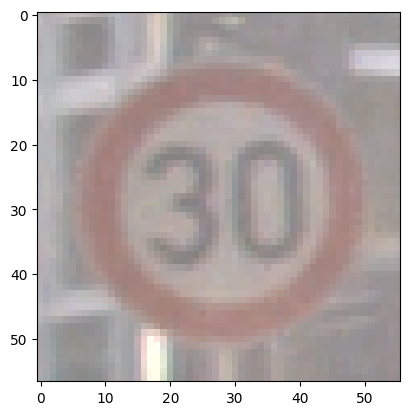

In [184]:
plt.imshow(image)

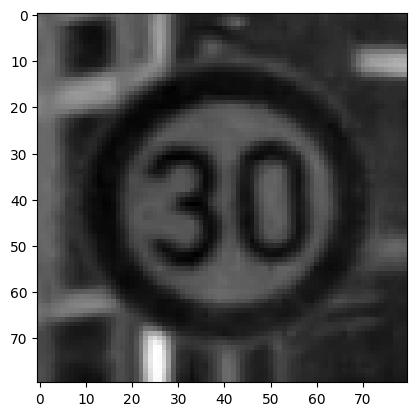

In [185]:
plt.imshow(gray, cmap = "gray")

### Let's load the saved models 

In [186]:
model = pickle.load(open('dsa_image_classification_sgd.pickle','rb'))
scaler = pickle.load(open('dsa_scaler.pickle','rb'))

In [187]:
# Check the shape of the feature_vector
print(feature_vector.shape)

(3240,)


In [188]:

# Transform the data using the scaler
scalex = scaler.transform(feature_vector.reshape(-1, 360))

# Make a prediction using the model and scaled data
result = model.predict(scalex)

In [189]:
result

array([13, 17, 13, 13, 35, 25, 12, 17, 13], dtype=uint8)

### calculate the probabilty 

In [190]:
decision_value = model.decision_function(scalex)

In [191]:
decision_value

array([[ -86.30318305,  -75.00467513,  -74.63911849,  -91.44970243,
         -98.87522291,  -85.06615711,  -65.27656955,  -94.13218187,
         -93.27186384,  -64.08834844,  -63.45009997,  -57.58158482,
         -41.10566765,  -26.90695368,  -44.95476031,  -78.40579538,
         -94.2491459 ,  -27.9440865 ,  -47.78735367,  -58.20743284,
         -42.50427125,  -62.65091021,  -51.5922751 ,  -44.65397971,
         -61.56178947,  -32.77418563,  -40.09373218,  -65.89272155,
         -52.46817815,  -61.70681017,  -44.88318417,  -50.52211574,
         -72.32157973,  -41.37212881,  -72.51941082,  -51.96909034,
         -63.31143225,  -51.08918896,  -36.00149082,  -44.16974921,
         -55.58322558,  -56.11844413,  -54.73308958],
       [ -84.57987252,  -75.4122715 ,  -58.45865776,  -59.7145252 ,
         -88.50624955,  -61.38015363,  -61.36371574,  -82.88834758,
         -69.81536129,  -46.61772261,  -47.11445633,  -72.32731054,
         -48.82164637,  -28.57612777,  -43.71280353,  -81.9466

In [219]:
labels = model.classes_

In [220]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [221]:
decision_value = decision_value.flatten()

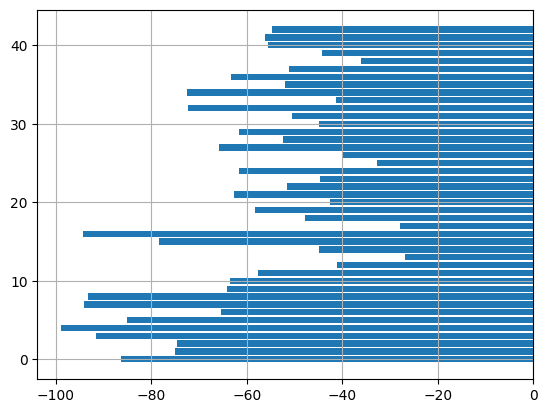

In [222]:
# Sort decision_value in the same order as labels
sorted_indices = np.argsort(labels)
sorted_decision_value = decision_value[sorted_indices]

# Plot bar chart with sorted decision_value and labels
plt.barh(labels[sorted_indices], sorted_decision_value)
plt.grid()


### Let's calculate the probability for each class. In order to do that, we must calculate the z-score for each class

In [206]:
from scipy import stats
import scipy

In [215]:
# cal. z score
z = scipy.stats.zscore(decision_value) # scipy.stats.zscore is a funtion for calculating the z-score for each class in a dataset 
prob_value = scipy.special.softmax(z)
prob_value

array([5.89823324e-04, 9.44895713e-04, 9.59412995e-04, 4.75880098e-04,
       3.49133211e-04, 6.21054215e-04, 1.41774930e-03, 4.25507215e-04,
       4.41053007e-04, 1.48978281e-03, 1.52997465e-03, 1.95428057e-03,
       3.88537366e-03, 7.02472386e-03, 3.30910134e-03, 8.19928073e-04,
       4.23436444e-04, 6.72732738e-03, 2.94035847e-03, 1.90392686e-03,
       3.66520603e-03, 1.58183366e-03, 2.50886721e-03, 3.35087655e-03,
       1.65534766e-03, 5.49983703e-03, 4.05287360e-03, 1.38177847e-03,
       2.41886432e-03, 1.64536519e-03, 3.31899503e-03, 2.62338853e-03,
       1.05678259e-03, 3.84243117e-03, 1.04809856e-03, 2.46974445e-03,
       1.53884923e-03, 2.56206776e-03, 4.80717792e-03, 3.41924178e-03,
       2.12415072e-03, 2.07725754e-03, 2.20082114e-03, 6.33779381e-04,
       9.28967778e-04, 1.88408094e-03, 1.78793073e-03, 5.38041094e-04,
       1.66793600e-03, 1.66907995e-03, 6.80108970e-04, 1.17323081e-03,
       3.08735845e-03, 3.02405153e-03, 1.05653002e-03, 2.81620997e-03,
      

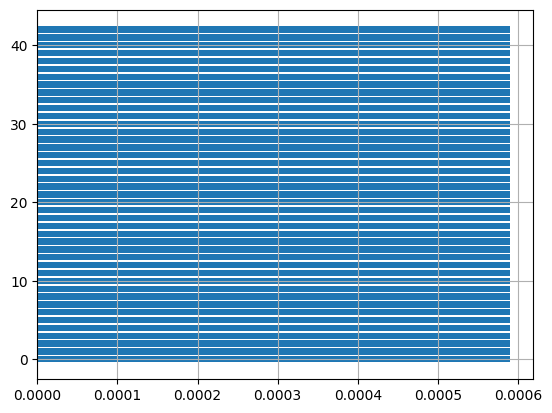

In [257]:
z = scipy.stats.zscore(decision_value) ## scipy.stats.zscore is a funtion for calculating the z-score for each class in a dataset 
prob_value = scipy.special.softmax(z, axis=0) # softmax over the second axis

# obtain the unique class labels from decision_value
#labels = np.unique(decision_value)

# plot the bar chart
plt.barh(labels, prob_value[0])
plt.grid()
plt.show()

In [245]:
# top five probabilty values
top_5_prob_ind = prob_value.argsort()[::-1][:5]
top_labels = labels[top_5_prob_ind[top_5_prob_ind < len(labels)]]
top_prob = prob_value[top_5_prob_ind[top_5_prob_ind < len(labels)]]


In [246]:
top_5_prob_ind

array([207, 142, 190, 185,  99])

In [243]:
top_labels = labels[top_5_prob_ind[top_5_prob_ind < len(labels)]]
top_prob = prob_value[top_5_prob_ind[top_5_prob_ind < len(labels)]]

In [247]:
top_prob, top_labels

(array([], dtype=float64), array([], dtype=uint8))

In [258]:
top_5_prob_ind = prob_value.argsort()[::-1][:5]
top_5_prob_ind_valid = top_5_prob_ind[top_5_prob_ind < len(labels)]
top_labels = labels[top_5_prob_ind_valid]
top_prob = prob_value[top_5_prob_ind_valid]

In [255]:
top_5_prob_ind

array([207, 142, 190, 185,  99])

In [259]:
top_labels

array([], dtype=uint8)

In [252]:
try:
    top_5_prob_ind = prob_value.argsort()[::-1][:5]
    valid_indices = top_5_prob_ind[top_5_prob_ind < len(labels)]
    if len(valid_indices) == 0:
        #print("Error: no labels with non-zero probabilities")
        top_labels = []
        top_prob = []
    else:
        top_labels = labels[valid_indices]
        top_prob = prob_value[valid_indices]
        print("Top labels:", top_labels)
        print("Top probabilities:", top_prob)
except IndexError:
    print("Error: invalid index when selecting labels and probabilities")
except:
    print("Error: unexpected error occurred")
    

In [253]:
top_labels

[]